In [1]:
from torchvision import models
import torch
import numpy as np
from explanable.common.utilize import readImageAndPreprocessing
from explanable.explainmethods.SmoothGradExpl import SmoothGradExplClass
from explanable.visualization import visual
from explanable.metrics import MorfLerf
from explanable.visualization.visual import showChapter
from explanable.visualization.visual import showByPictures

%load_ext autoreload
%autoreload 2

PATH_TO_IMAGE = "../image/deer.png"
# PATH_TO_IMAGE = '../image/cat.jpg'
inputs = readImageAndPreprocessing(PATH_TO_IMAGE)
print(inputs.shape)

(1, 3, 224, 224)


In [2]:
model = models.resnet50()
model.load_state_dict(torch.load('../pretrainingmodel/resnet50-0676ba61.pth'))
model.eval()
print()

In [3]:
sm = SmoothGradExplClass(model)
sm.explain(20, 0.1, inputs)
print(sm.result.shape)

  0%|          | 0/20 [00:00<?, ?it/s]C:\Users\Alex\Explainable\explanable\explainmethods\AbstractExplainable.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels_onehot = torch.tensor(torch.nn.functional.one_hot(torch.tensor(label),
100%|██████████| 20/20 [00:02<00:00,  7.36it/s]

(1, 3, 224, 224)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


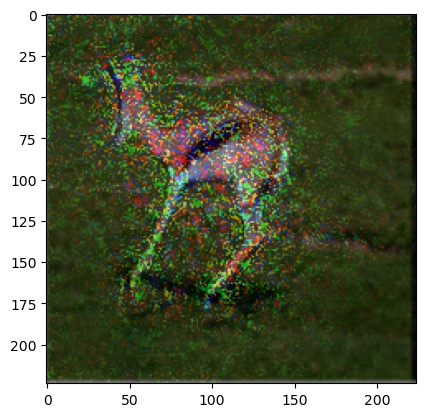

In [4]:
visual.showExplanation(np.maximum(sm.result, 0) * 500, PATH_TO_IMAGE)


In [5]:
print(inputs.shape)
ml = MorfLerf.MorfLerfClass(model)
ml.setExplanation(sm)
probeMorf, probeLerf = ml.evaluate(inputs)

(1, 3, 224, 224)


0.05562833186773527
0.7012826626832109


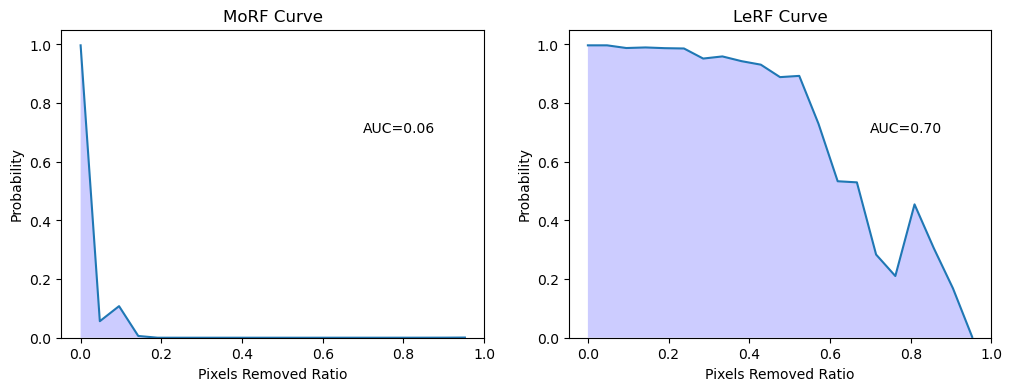

In [7]:
showChapter(probeMorf, probeLerf)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

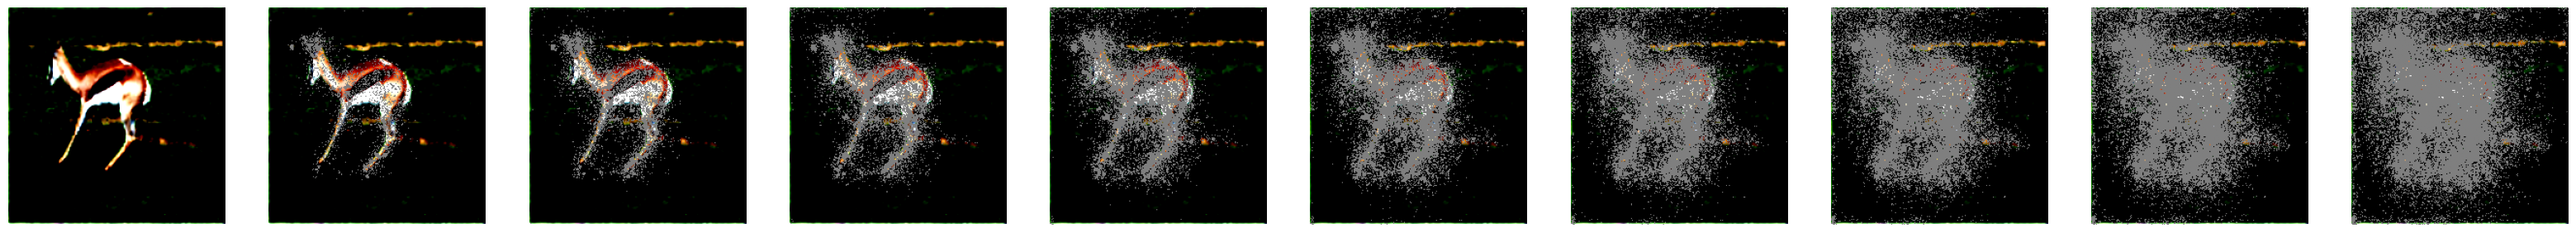

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

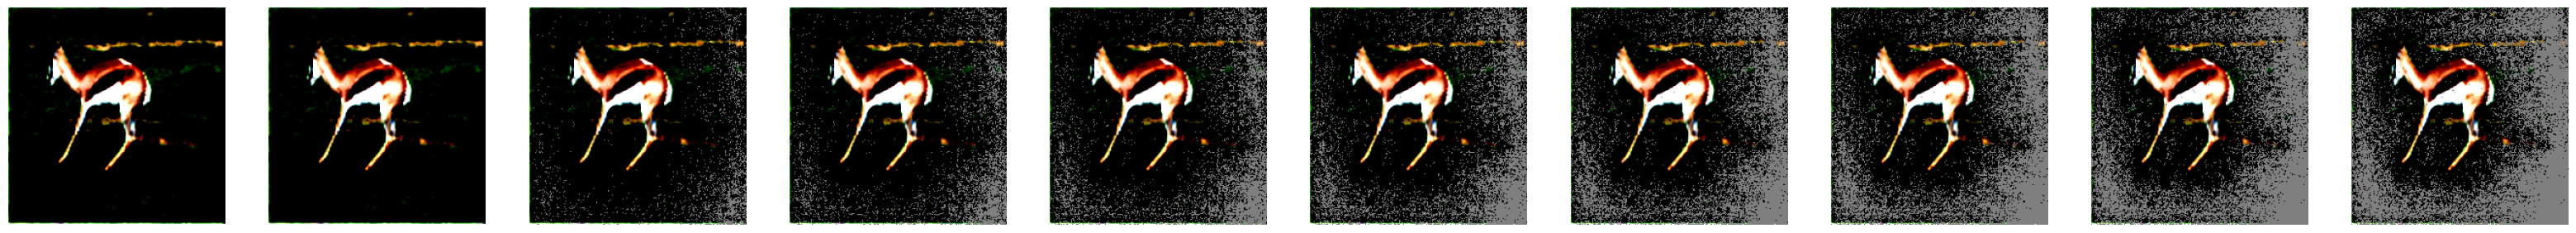

In [8]:
showByPictures(ml.intermediaResults)

  0%|          | 0/20 [00:00<?, ?it/s]C:\Users\Alex\Explainable\explanable\explainmethods\AbstractExplainable.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels_onehot = torch.tensor(torch.nn.functional.one_hot(torch.tensor(label),
100%|██████████| 20/20 [00:02<00:00,  7.19it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 3, 224, 224)
0.053667302814574214
0.7232955917993206


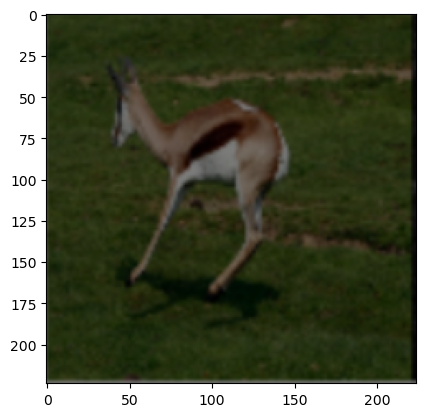

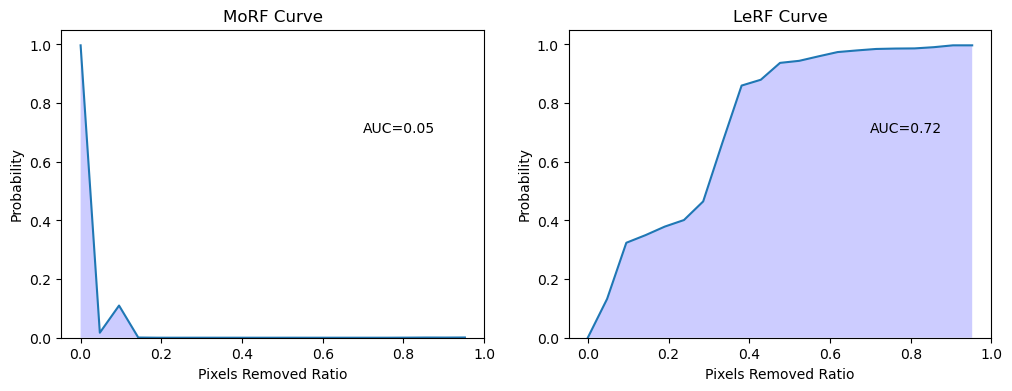

In [10]:
from explanable.metrics.DeletionInsertion import DeletionInsertionClass

gc = SmoothGradExplClass(model)
gc.explain(20, 0.1, inputs)
print(gc.result.shape)

visual.showExplanation(gc.result, PATH_TO_IMAGE)

ml = DeletionInsertionClass(model)
ml.setExplanation(gc)
probeDel, probeIns = ml.evaluate(inputs)

showChapter(probeDel, probeIns)